In [2]:
import sys
import os

import sys
sys.path.insert(0, os.path.abspath('../src/'))
sys.path.insert(1, os.path.abspath('../src/rl/'))
sys.path.insert(2, os.path.abspath('../src/rl/agents/'))
sys.path.insert(4, os.path.abspath('../src/rl/agents/base/'))
sys.path.insert(5, os.path.abspath('../src/rl/environments/'))
sys.path.insert(6, os.path.abspath('../src/rl/environments/base'))
sys.path.insert(7, os.path.abspath('../src/rl/harnesses/'))
sys.path.insert(8, os.path.abspath('../src/rl/agents/tabular/'))

In [14]:
from agents.RandomTrader import RandomTrader
from environments.GenerativeMarketEnv import GenerativeMarketEnv
from harnesses.SimHarness import SimHarness
from TabularTrader import TabularTrader
from AgentArgs import AgentArgs

import seaborn as sns
import numpy as np
import itertools

In [15]:
sns.set_theme()
sns.set_palette("pastel")
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Calculating Weights

In [16]:
def calculate_valid_weights(num_assets, num_increments):
    ws = []
    for n in range(num_assets):
        ws.append(np.linspace(0, 1, num_increments))
    ws = list(itertools.product(*ws))
    return list(filter(lambda a: sum(a) == 1, ws))

In [17]:
ws = calculate_valid_weights(3, 5)

In [19]:
ws

[(0.0, 0.0, 1.0),
 (0.0, 0.25, 0.75),
 (0.0, 0.5, 0.5),
 (0.0, 0.75, 0.25),
 (0.0, 1.0, 0.0),
 (0.25, 0.0, 0.75),
 (0.25, 0.25, 0.5),
 (0.25, 0.5, 0.25),
 (0.25, 0.75, 0.0),
 (0.5, 0.0, 0.5),
 (0.5, 0.25, 0.25),
 (0.5, 0.5, 0.0),
 (0.75, 0.0, 0.25),
 (0.75, 0.25, 0.0),
 (1.0, 0.0, 0.0)]

## How do the number of weights vary with increment size

In [37]:
possibilities_inc = [] 
for incr in range(2, 60):
    ws = calculate_valid_weights(3, incr)
    tot = len(ws)
    possibilities_inc.append(tot)

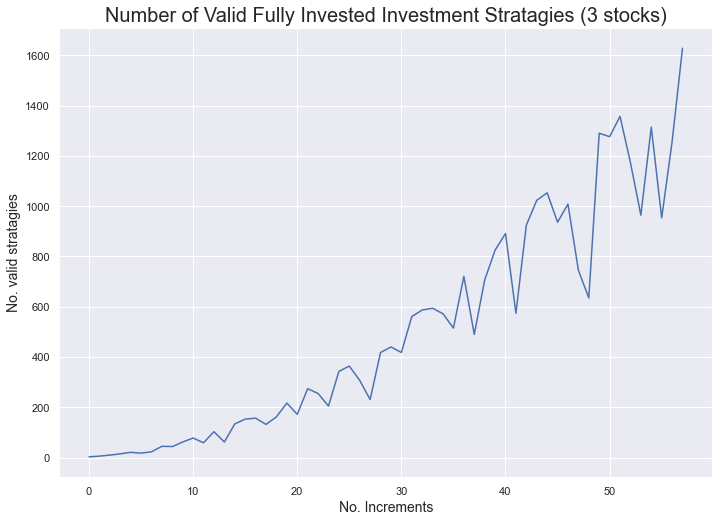

In [43]:
import matplotlib.pyplot as plt

plt.title('Number of Valid Fully Invested Investment Stratagies (3 stocks)', size=20)
plt.xlabel('No. Increments', size=14)
plt.ylabel('No. valid stratagies', size=14)
plt.plot(np.arange(58), possibilities_inc)

In [39]:
possibilities_stocks = [] 
for stocks in range(2, 12):
    ws = calculate_valid_weights(stocks, 5)
    tot = len(ws)
    possibilities_stocks.append(tot)

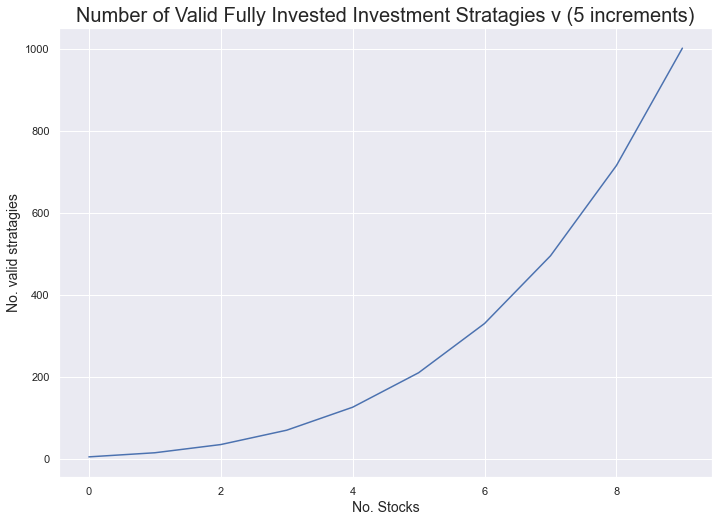

In [42]:
import matplotlib.pyplot as plt

plt.title('Number of Valid Fully Invested Investment Stratagies v (5 increments)', size=20)
plt.xlabel('No. Stocks', size=14)
plt.ylabel('No. valid stratagies', size=14)
plt.plot(np.arange(10), possibilities_stocks)

## Two Assets

In [4]:
# create a generitive market that produces returns on two assets
μ = [1, 8]
Σ = [[0.2, 0], [0, 0.4]]
market = GenerativeMarketEnv(μ, Σ)

In [5]:
# args = AgentArgs(ϵ=lambda t: 1./t**0.5, n_assets= 2, n_inc=5)
args = AgentArgs(ϵ=lambda t: 0.1, n_assets= 2, n_inc=5)
trader = TabularTrader(args)

In [6]:
# create a harness to run the simulation
harness = SimHarness(market, trader)

In [7]:
harness.train(1000)

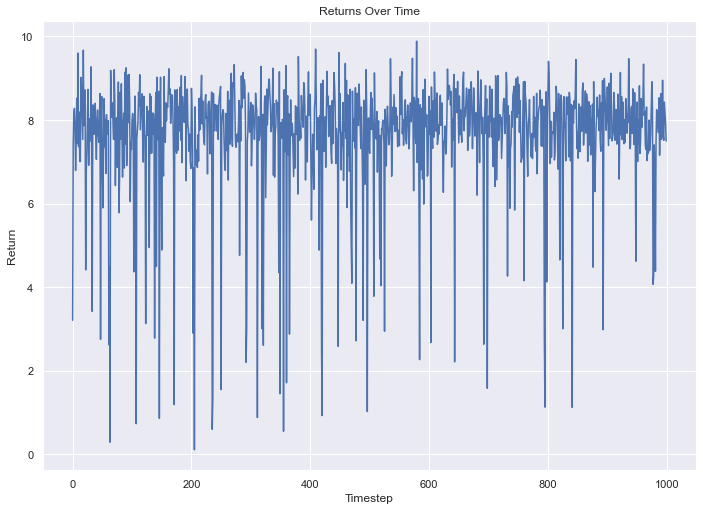

In [8]:
harness.plot_training_results()

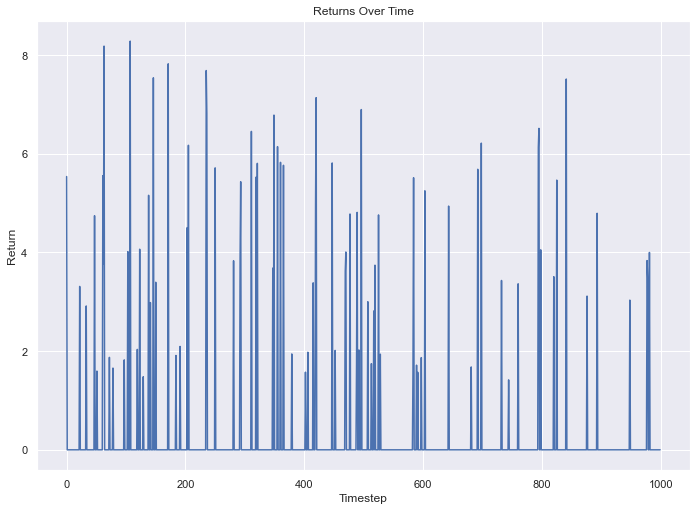

In [10]:
harness.plot_training_regret()

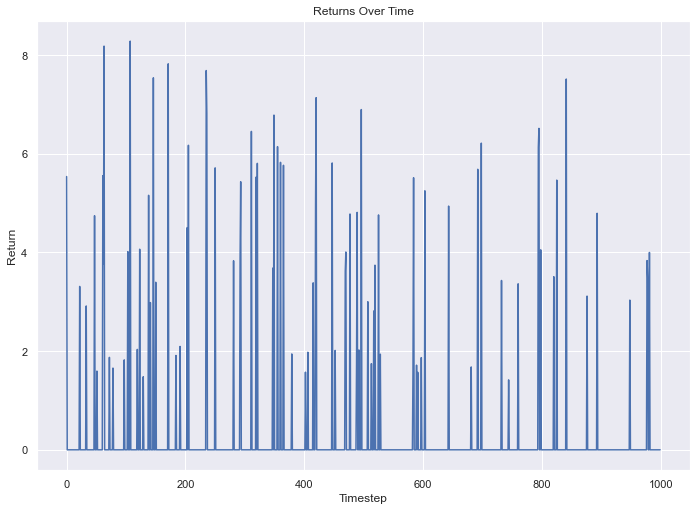

In [15]:
harness.plot_training_regret()

In [16]:
trader.Q

array([8.00586904, 6.29397795, 4.37290684, 2.76457239, 0.99976773])

In [17]:
trader.actions

[(0.0, 1.0), (0.25, 0.75), (0.5, 0.5), (0.75, 0.25), (1.0, 0.0)]

# Ten Assets

In [18]:
# create a generitive market that produces returns on two assets
μ = [1, 8, 8.5, 7.5, 0.4, 8.3, 7.9, 8.9, 4.1, 2.2]
Σ = [
    [0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.3, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0.7, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.7, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6]
    ]
market = GenerativeMarketEnv(μ, Σ)

In [19]:
# args = AgentArgs(ϵ=lambda t: 1./t**0.5, n_assets= 2, n_inc=5)
args = AgentArgs(ϵ=lambda t: 0.1, n_assets= 10, n_inc=5)
trader = TabularTrader(args)
# create a harness to run the simulation
harness = SimHarness(market, trader)

In [20]:
harness.train(1000)

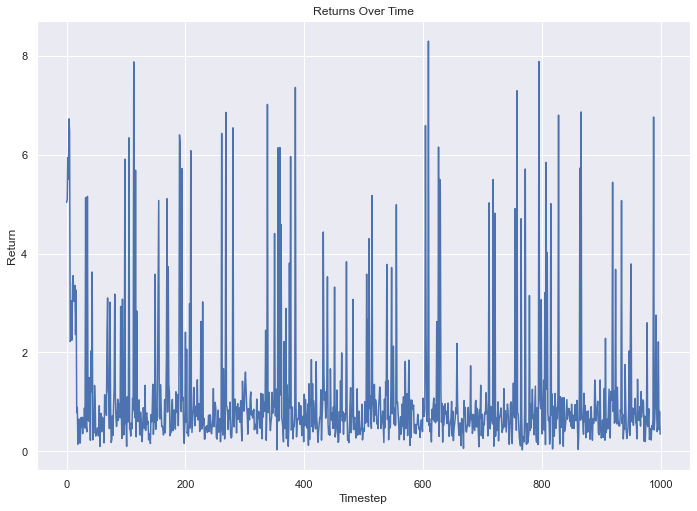

In [21]:
harness.plot_training_regret()

In [ ]:
harness.pl()

In [32]:
import numpy as np
np.argmax(trader.Q)

278

In [34]:
trader.actions[278]

(0.0, 0.0, 0.25, 0.25, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0)

In [57]:
import numpy as np